Importing Dependencies

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Importing the Boston House Price Dataset

In [3]:
df= sklearn.datasets.load_boston()
df

ImportError: ignored

In [40]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

df= pd.read_csv('/content/drive/MyDrive/ML/siddhardhan/ml projects/boston house price prediction/housing.csv',header=None, names=column_names)
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


 Variables in order:

 1. CRIM     per capita crime rate by town
 2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 3. INDUS    proportion of non-retail business acres per town
 4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 5. NOX      nitric oxides concentration (parts per 10 million)
 6. RM       average number of rooms per dwelling
 7. AGE      proportion of owner-occupied units built prior to 1940
 8. DIS      weighted distances to five Boston employment centres
 9. RAD      index of accessibility to radial highways
 10. TAX      full-value property-tax rate per USD 10,000
 11. PTRATIO  pupil-teacher ratio by town
 12. B        1000 '(Bk - 0.63)^2' where Bk is the proportion of blacks by town
 13. LSTAT    % lower status of the population
 14. MEDV     Median value of owner-occupied homes in $1000's

In [45]:
df.rename(columns={'MEDV':'price'},inplace=True)

In [46]:
df.shape

(506, 14)

Check data type & missing values

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Statistical measures of data

In [48]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding correlation between various features in the data

1. Positive Corr
2. Negative corr

In [ ]:
df.corr()

<Axes: >

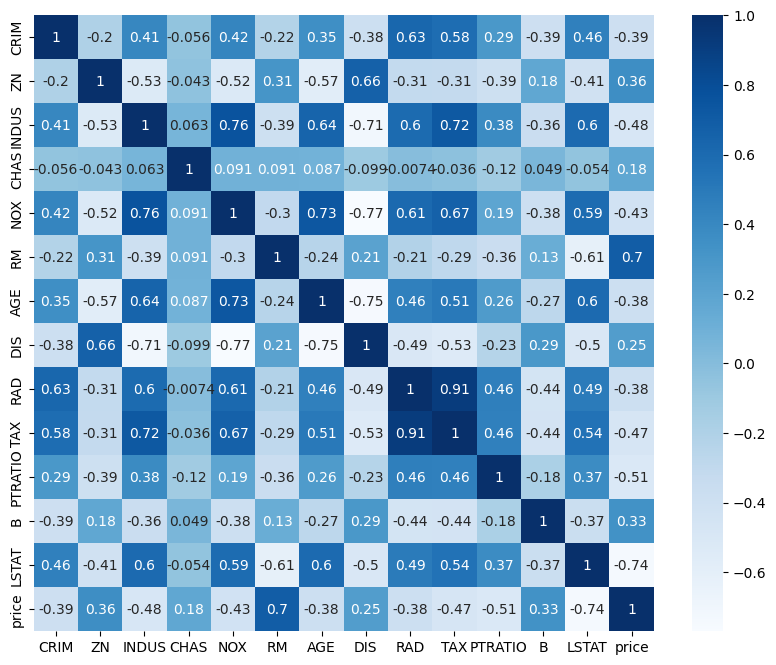

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')


Splitting the features & target

In [54]:
X= df.drop(columns=['price'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [78]:
# standardizing the features

scaler= StandardScaler()

X_transf = scaler.fit_transform(X)
X_transf


# Note: Scaling seems to have to effect on accuracy of prediction probably because XGB uses DT as base models or the xgb model internally performs scaling

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [62]:
Y= df['price']
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [84]:
X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

Model creation & Training

In [85]:
reg_model= XGBRegressor()

In [86]:
reg_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model prediction & Evaluation on test data

In [87]:
Y_pred= reg_model.predict(X_test)

In [92]:
# R squared error
r2_score(Y_test,Y_pred)

0.9051721149855378

In [93]:
# mean absolute error
mean_absolute_error(Y_test,Y_pred)

2.0748727686264927

Visualize actual prices & predicted prices

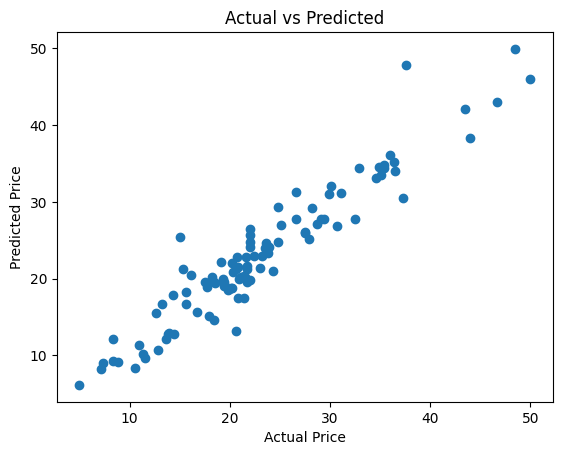

In [95]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.title('Actual vs Predicted')
plt.show()